<center>

*******************************************************************************************

### Pose Tracking in Video Files, Pre-processing, and Audio Extraction

##### 12 April 2025

##### Juan Ignacio Mendoza Garay

*******************************************************************************************

</center>

##### INFORMATION:

* This program extracts one point of the human body (in this demonstration the nose), for every tracked person in the picture. A video file is produced with superimposed skeletons of tracked pose. Then, extraneous data is removed, missing data is interpolated, and tabular data is arranged. The resulting table has columns {p1_x,p1_y,p2_x,p2_y,...} where p is a tracked person from left to right, and {x,y} are horizontal and vertical coordinates of the point. Also, the audio from the video is extracted and it is added to the video of tracked pose.

* Tested using:
    * Python 3.11
    * Windows 11
    * Intel 64-bit CPU
>
* Dependencies:
    * AlphaPose fork: https://github.com/juigmend/AlphaPose \
      Take note of the path of the folder where it is installed or copied to, because it is required when calling it.
    * cython_bbox:
        1) install Desktop Development with C++ from the Visual Studio Installer
        2) type to command prompt: \
           set DISTUTILS_USE_SDK=1
        3) install cython_bbox (e.g., using pip, conda, or other method)
    * ffmpeg with path added to the system
    * Other packages might be prompted for installation.
>
* Instructions:

    If necessary, edit the values indicated with an arrow like this: <---

* To improve the quality of tracking these can be tried:

    *   use video with higher resolution if available
    *   change parameters in detector/yolo_cfg.py, start by increasing INP_DIM
    *   use another detector (e.g., yolox-x, yolox-l)
    *   use another pretrained model
    *   see documentation: https://github.com/MVIG-SJTU/AlphaPose/tree/master/docs

*******************************************************************************************

In [1]:
from sys import path as sys_path
from os import chdir as os_chdir

sys_path.append(r"..\src")
import syncoord as sc

os_chdir(r"..\data")

***
### Set paths and parameters
These folders should exist before running the program. They will not be created automatically.

In [2]:
project_folder = r"string_quartet_Ecossaise"            # <--- project folder
video_in_path = project_folder+r"\input_video"          # <--- input video files

# Paths for resulting files:
pose_tracking_path = project_folder + r'\pose_tracking' # <---
video_out_path = pose_tracking_path+r'\video'           # <--- video with superimposed skeletons
json_path = pose_tracking_path+r'\tracking'             # <--- tracking (json format)
prep_path = pose_tracking_path + r'\preprocessed'       # <--- pre-processed data (parquet format)
figs_path = pose_tracking_path + r'\figures'            # <--- raw and pre-processed data figures

AlphaPose_path = r"C:\MyTemp\AlphaPose"                 # <--- AlphaPose code

***
### Pose-tracking

The function below:
* detects and track pose from video
* extracts audio from the input video
* produces video with superimposed skeletons, with and without audio.

> To run a grid-parameter test, input a list to one or more of optional arguments idim, thre, and conf. Since it may take a long time, it is convenient to run the test with a small portion of the video. The portion of the video is specified by argument trim_range.

In [6]:
ptrack_kwargs = {
                 'video_out_path':video_out_path,
                 'trim_range':[0,'end'],          # <--- trim range (seconds), scalars or 'end'
                 'log_path': pose_tracking_path,  # <--- path for log text file
                 'skip_done': False,              # <--- skip if resulting json file exists
                 'idim': 640,                     # <--- input size (multiple of 32, more=better)
                 'parlbl':True,                   # <--- parameters label in file names
                 'suffix': '_demo',               # <--- custom label for file names
                }
sc.video.posetrack( video_in_path, json_path, AlphaPose_path, **ptrack_kwargs )

cQcukN4BWkM.mp4 : 
idim = 640; thre = 0.6; conf = 0.1
computing time = 1:35:37.447 (H:M:S)





***
### Pre-processing

AlphaPose_cQcukN4BWkM_[640,0.6,0.1]_demo.json : processing...


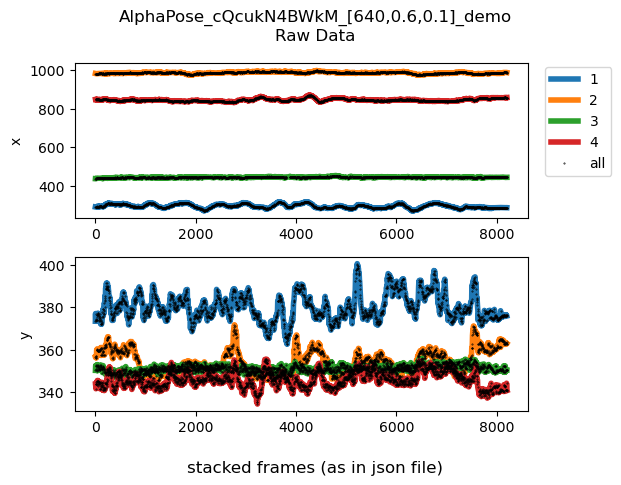

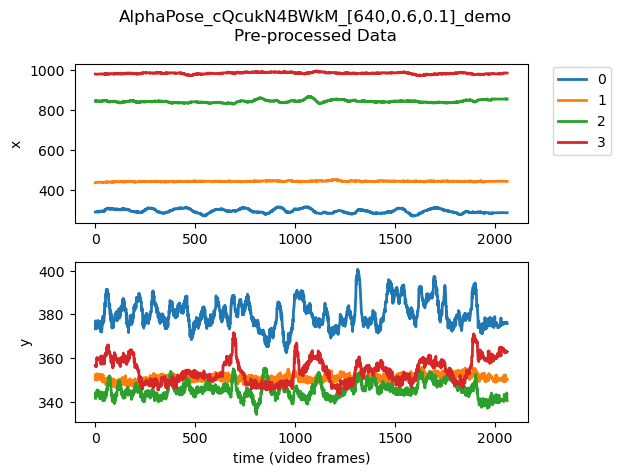

done


In [6]:
# Paths to save pre-processing results:
savepaths = {
             'parquet':prep_path,       # <--- preprocessed data files (parquet format)
             'rawfig': figs_path,       # <--- raw data visualisations
             'prepfig': figs_path,      # <--- preprocessed data visualisatons
             'log': pose_tracking_path  # <--- log text file
            }
prepargs = { 'skip_done':False }        # <--- skip if resulting json file exists

sc.video.poseprep(json_path,savepaths,**prepargs)